# Observation Astronomy Group Project 1: Group 03
We will be trying to get a CMD of the M15 star cluster: https://en.wikipedia.org/wiki/Messier_15<br>

In [116]:
# Imports
import numpy as np
import os
from glob import glob
from astropy.io import fits
import astropy.stats

import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.time import Time
from astroplan import FixedTarget, Observer
from astroplan.plots import dark_style_sheet, plot_airmass
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
%matplotlib inline

from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2c33dc4be80>

<AxesSubplot:xlabel='Time from 2021-10-08 [UTC]', ylabel='Airmass'>

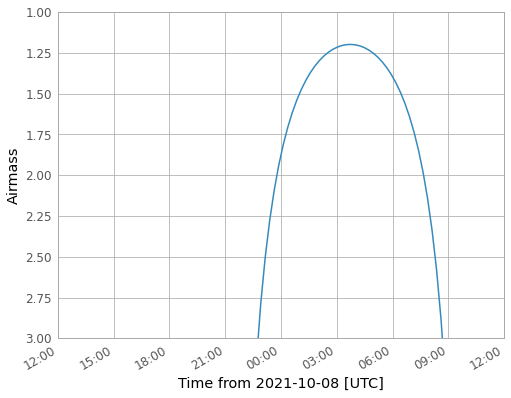

In [117]:
# Easy airmass plot
time = Time('2021-10-09 00:00')
target = FixedTarget.from_name('M15')
obs = Observer(name='Bozeman',longitude=-111.0429*u.deg,
               latitude=45.6770*u.deg,elevation=1461*u.m,timezone='US/Mountain')
plot_airmass(target, obs, time, use_local_tz=True)

In [118]:
# airmass  plot done in local time
# With respect to midnight
m15 = SkyCoord.from_name('M15')
bozeman = EarthLocation(lat=45.6770*u.deg, lon=-111.0429*u.deg, height=1461*u.m)
utcoffset = -6*u.hour  # Mountain Daylight Time: https://www.worldtimebuddy.com/
time = Time('2021-10-09 20:00:00') - utcoffset
m15altaz = m15.transform_to(AltAz(obstime=time,location=bozeman))
print(f"M15's Altitude = {m15altaz.alt:.2}")

M15's Altitude = 5e+01 deg


In [119]:
# With 
eight = Time('2021-10-09 20:00:00') - utcoffset
delta_eight = np.linspace(-2, 10, 100)*u.hour
frame_Oct10night = AltAz(obstime=eight+delta_eight, location=bozeman)
m15altazs_Oct10night = m15.transform_to(frame_Oct10night)
m15airmass_Oct10night = m15altazs_Oct10night.secz

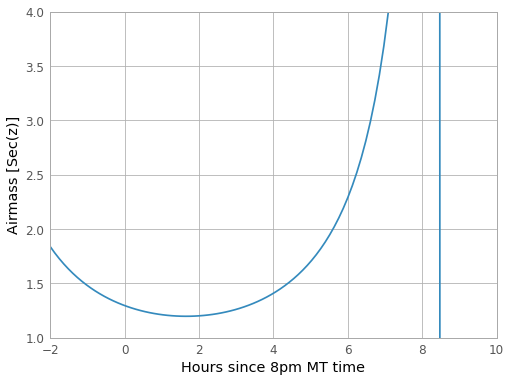

In [120]:
plt.plot(delta_eight, m15airmass_Oct10night)
plt.xlim(-2, 10)
plt.ylim(1, 4)
plt.xlabel('Hours since 8pm MT time')
plt.ylabel('Airmass [Sec(z)]')
plt.show()

# Plotting and analyzing Oct 09 data

In [111]:
def plot_it(im, vmin=-1, vmax=-1):
    plt.figure(figsize=(14,10))
    if vmin == -1 and vmax == -1:
        plt.imshow(im,aspect='auto',origin='lower', cmap='viridis')
    else:
        plt.imshow(im,aspect='auto', vmin=vmin, vmax=vmax,origin='lower',cmap='viridis')
    plt.colorbar()
    plt.show()

In [15]:
ls data\observation_2021_10_09\

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\OneDrive\Documents\GitHub\ObservationalAstro_PHSX491\data\observation_2021_10_09

10/10/2021  10:03 AM    <DIR>          .
10/10/2021  10:03 AM    <DIR>          ..
10/05/2021  10:33 AM        18,285,120 CCD Image 1.fit
10/09/2021  08:08 PM        18,285,120 CCD Image 10.000000.fit
10/05/2021  10:34 AM        18,285,120 CCD Image 10.fit
10/09/2021  08:12 PM        18,285,120 CCD Image 11.000000.fit
10/05/2021  10:40 AM        18,285,120 CCD Image 11.fit
10/09/2021  09:36 PM        18,285,120 CCD Image 119.fit
10/09/2021  08:13 PM        18,285,120 CCD Image 12.000000.fit
10/05/2021  10:41 AM        18,285,120 CCD Image 12.fit
10/09/2021  09:37 PM        18,285,120 CCD Image 120.fit
10/09/2021  09:38 PM        18,285,120 CCD Image 121.fit
10/09/2021  09:39 PM        18,285,120 CCD Image 122.fit
10/09/2021  09:40 PM        18,285,120 CCD Image 123.fit
10/09/2021  09:40 PM        18,285,120 CCD Ima

In [16]:
# A little script to get information on all the fits files
def ccdlist(input=None):
    if input is None: input='*.fits'
    files = glob(input)
    nfiles = len(files)
    dt = np.dtype([('file',np.str,100),('naxis1',int),('naxis2',int),
                      ('imagetyp',np.str,100),('exptime',float),('filter',np.str,100)])
    cat = np.zeros(nfiles,dtype=dt)
    for i,f in enumerate(files):
        base = os.path.basename(f)
        base = base.split('.')[0]
        h = fits.getheader(f)
        cat['file'][i] = f
        cat['naxis1'][i] = h.get('naxis1')
        cat['naxis2'][i] = h.get('naxis2')
        cat['imagetyp'][i] = h.get('imagetyp')
        cat['exptime'][i] = h.get('exptime')
        cat['filter'][i] = h.get('filter')
        print(base+'  '+str(cat['naxis1'][i])+'  '+str(cat['naxis2'][i])+'  '+cat['imagetyp'][i]+'  '+str(cat['exptime'][i])+'  '+cat['filter'][i])
    return cat

In [98]:
out=ccdlist("data/observation_2021_10_09/*.fit")

<ipython-input-16-ac16341c24ce>:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dt = np.dtype([('file',np.str,100),('naxis1',int),('naxis2',int),
<ipython-input-16-ac16341c24ce>:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ('imagetyp',np.str,100),('exptime',float),('filter',np.str,100)])


CCD Image 1  3380  2704  Bias Frame  0.001000000047497  None
CCD Image 10  3380  2704  Flat Field  90.0  Luminance
CCD Image 10  3380  2704  Bias Frame  0.001000000047497  None
CCD Image 11  3380  2704  Flat Field  90.0  Luminance
CCD Image 11  3380  2704  Dark Frame  300.0  None
CCD Image 119  3380  2704  Flat Field  30.0  Luminance
CCD Image 12  3380  2704  Flat Field  90.0  Luminance
CCD Image 12  3380  2704  Flat Field  5.0  Green
CCD Image 120  3380  2704  Flat Field  30.0  Luminance
CCD Image 121  3380  2704  Flat Field  30.0  Luminance
CCD Image 122  3380  2704  Flat Field  20.0  Luminance
CCD Image 123  3380  2704  Flat Field  20.0  Luminance
CCD Image 124  3380  2704  Flat Field  20.0  Luminance
CCD Image 125  3380  2704  Light Frame  1.0  Luminance
CCD Image 126  3380  2704  Light Frame  1.0  Luminance
CCD Image 127  3380  2704  Light Frame  1.0  Luminance
CCD Image 128  3380  2704  Light Frame  1.0  Luminance
CCD Image 129  3380  2704  Light Frame  1.0  Luminance
CCD Image 1

In [28]:
print(out[0][0])

data/observation_2021_10_09\CCD Image 1.fit


(1212.0145982287615, 1211.0, 48.4242524336669)


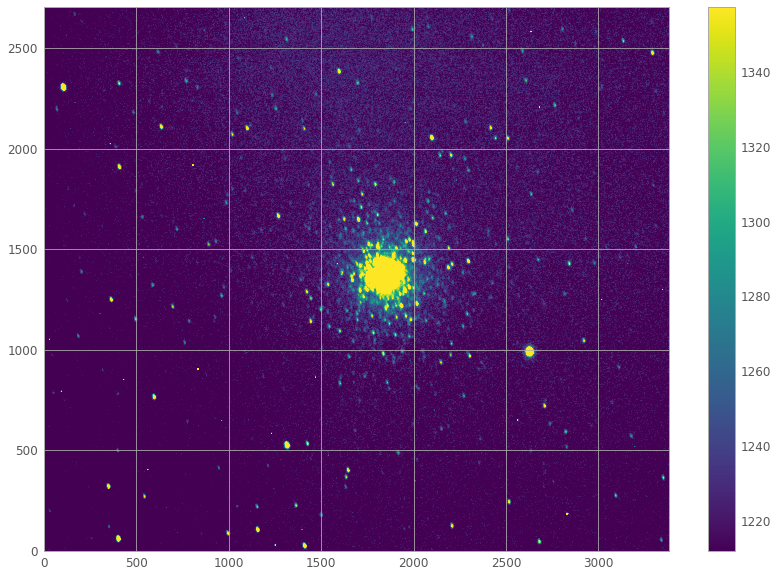

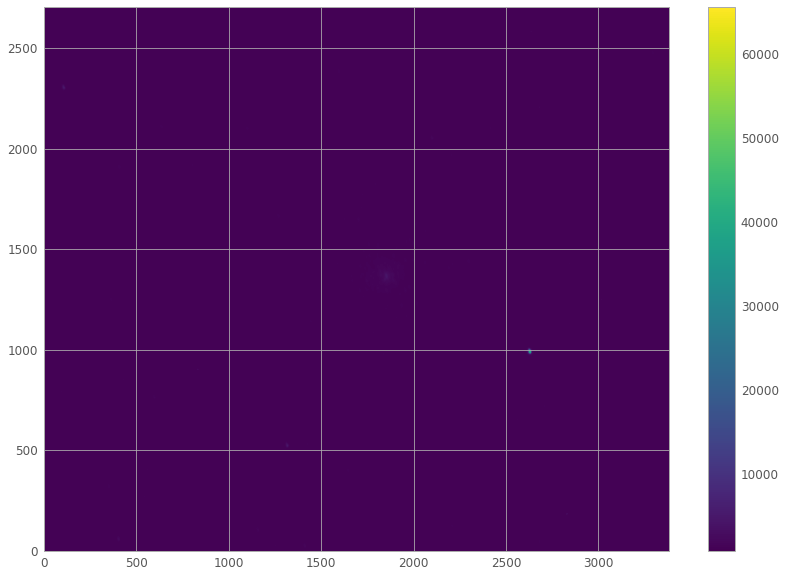

In [133]:
im, head = fits.getdata('data/observation_2021_10_09\candidates\CCD Image 363.fit',0,header=True)
stats = astropy.stats.sigma_clipped_stats(im)
print(astropy.stats.sigma_clipped_stats(im))
plot_it(im, vmin=stats[0],vmax=stats[0]+3*stats[2])
plot_it(im)

In [76]:
im, head = fits.getdata('data/observation_2021_10_09\\CCD Image 12.fit',0,header=True)

In [78]:
head

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 3380 /fastest changing axis                           
NAXIS2  =                 2704 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2021-10-05T16:41:50.929'                                             
EXPTIME =   5.0000000000000000 /Exposure time in seconds                        
EXPOSURE=   5.0000000000000000 /Exposure time in seconds                        
XPIXSZ  =   3.6899999999999999 /Pixel Width in microns (after binning)          
YPIXSZ  =   3.6899999999999999 /Pixel Height in microns (after binning)         
XBINNING=                   

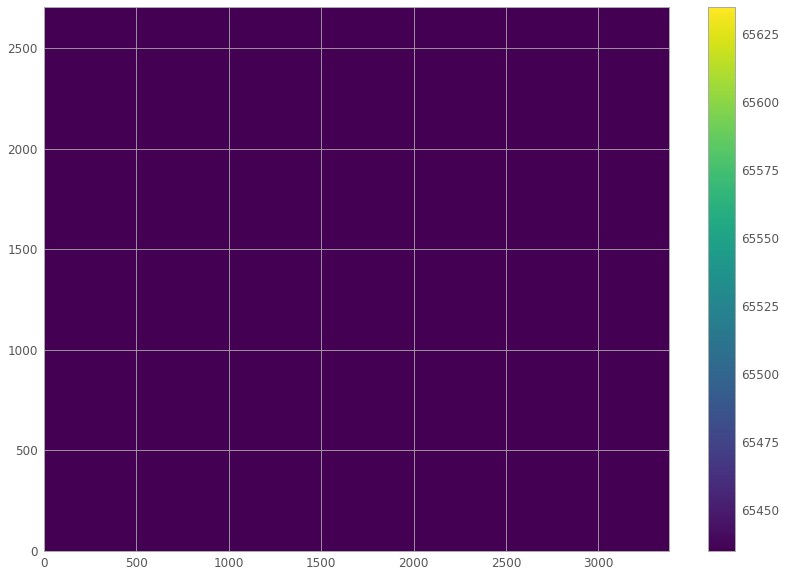

In [114]:
plot_it(im,65535-100, 65535+100)

In [81]:
im

array([[ 3205,  3271,  3220, ...,  3219,  3369,  3336],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       ...,
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535]], dtype=uint16)

In [87]:
im, head = fits.getdata('data/observation_2021_10_09\\CCD Image 12.fit',0,header=True)

In [108]:
obs_data = []
for i in out:
    im, head = fits.getdata(i[0],0,header=True)
    if head['DATE-OBS'][5:10] == "10-10":
        obs_data.append(i[0])
        print(i[0])

data/observation_2021_10_09\CCD Image 10.000000.fit
data/observation_2021_10_09\CCD Image 11.000000.fit
data/observation_2021_10_09\CCD Image 119.fit
data/observation_2021_10_09\CCD Image 12.000000.fit
data/observation_2021_10_09\CCD Image 120.fit
data/observation_2021_10_09\CCD Image 121.fit
data/observation_2021_10_09\CCD Image 122.fit
data/observation_2021_10_09\CCD Image 123.fit
data/observation_2021_10_09\CCD Image 124.fit
data/observation_2021_10_09\CCD Image 125.fit
data/observation_2021_10_09\CCD Image 126.fit
data/observation_2021_10_09\CCD Image 127.fit
data/observation_2021_10_09\CCD Image 128.fit
data/observation_2021_10_09\CCD Image 129.fit
data/observation_2021_10_09\CCD Image 13.fit
data/observation_2021_10_09\CCD Image 130.fit
data/observation_2021_10_09\CCD Image 131.fit
data/observation_2021_10_09\CCD Image 132.fit
data/observation_2021_10_09\CCD Image 133.fit
data/observation_2021_10_09\CCD Image 134.fit
data/observation_2021_10_09\CCD Image 135.fit
data/observation_

In [100]:
head['DATE-OBS'][5:10]

'10-10'

In [109]:
obs_data

['data/observation_2021_10_09\\CCD Image 10.000000.fit',
 'data/observation_2021_10_09\\CCD Image 11.000000.fit',
 'data/observation_2021_10_09\\CCD Image 119.fit',
 'data/observation_2021_10_09\\CCD Image 12.000000.fit',
 'data/observation_2021_10_09\\CCD Image 120.fit',
 'data/observation_2021_10_09\\CCD Image 121.fit',
 'data/observation_2021_10_09\\CCD Image 122.fit',
 'data/observation_2021_10_09\\CCD Image 123.fit',
 'data/observation_2021_10_09\\CCD Image 124.fit',
 'data/observation_2021_10_09\\CCD Image 125.fit',
 'data/observation_2021_10_09\\CCD Image 126.fit',
 'data/observation_2021_10_09\\CCD Image 127.fit',
 'data/observation_2021_10_09\\CCD Image 128.fit',
 'data/observation_2021_10_09\\CCD Image 129.fit',
 'data/observation_2021_10_09\\CCD Image 13.fit',
 'data/observation_2021_10_09\\CCD Image 130.fit',
 'data/observation_2021_10_09\\CCD Image 131.fit',
 'data/observation_2021_10_09\\CCD Image 132.fit',
 'data/observation_2021_10_09\\CCD Image 133.fit',
 'data/observa